In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
df = pd.read_excel('МКР2 Варіант 4 авіаперевезення.xlsx')

In [3]:
df = df.dropna(subset=['Verified'])
df.tail()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
324,322,2017-12-31 00:00:00,6,10,"""care more about food service""",D Karimancic,United States,2017-12-31 00:00:00,"Chicago to Vienna on their Boeing 767, with ...",Solo Leisure,Economy Class,Chicago to Vienna,December 2017,NaN,Boeing 767,1.0
325,323,2017-12-28 00:00:00,7,10,"""crew were friendly and attentive""",Aart de Vos,Netherlands,2017-12-28 00:00:00,Amsterdam to Kiev via Vienna. Check-in was m...,Solo Leisure,Business Class,Amsterdam to Kiev via Vienna,August 2017,NaN,A319 / ERJ195,1.0
326,324,2017-12-24 00:00:00,1,10,"""They lost my luggage""",Jana Snaselova,United States,2017-12-24 00:00:00,Frankfurt to Vienna. They lost my luggage on...,Solo Leisure,Economy Class,Frankfurt to Vienna,December 2017,no,NaN,1.0
327,325,2017-12-19 00:00:00,1,10,"""asked the steward to clean it""",Irina Kreger,United States,2017-12-19 00:00:00,Chicago to Vienna. The worst experience I h...,Family Leisure,Economy Class,Chicago to Vienna,November 2017,no,NaN,1.0
328,326,2017-12-01 00:00:00,3,10,"""an average experience""",S Robinson,Austria,2017-12-01 00:00:00,Vienna - Paris CDG in Economy almost a year a...,Couple Leisure,Economy Class,Vienna to Paris CDG,December 2016,no,A320,1.0


In [4]:
columns_to_keep = ['Rating', 'Seat Type', 'Country']

# Drop all columns except the ones in columns_to_keep
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Rating,Country,Seat Type
0,1,United States,Economy Class
1,2,United States,Business Class
2,1,Switzerland,Economy Class
3,8,Czech Republic,Economy Class
4,3,United Kingdom,Economy Class


In [5]:
df.shape

(309, 3)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df['Country Codes'] = df['Country'].astype('category').cat.codes
df['Seat Type Codes'] = df['Seat Type'].astype('category').cat.codes

In [8]:
df.head()

,Rating,Country,Seat Type,Country Codes,Seat Type Codes
0,1,United States,Economy Class,39,1
1,2,United States,Business Class,39,0
2,1,Switzerland,Economy Class,35,1
3,8,Czech Republic,Economy Class,11,1
4,3,United Kingdom,Economy Class,38,1


In [9]:
df.tail()

,Rating,Country,Seat Type,Country Codes,Seat Type Codes
304,6,United States,Economy Class,39,1
305,7,Netherlands,Business Class,23,0
306,1,United States,Economy Class,39,1
307,1,United States,Economy Class,39,1
308,3,Austria,Economy Class,3,1


In [10]:
df.isnull().sum()

Rating             0
Country            0
Seat Type          0
Country Codes      0
Seat Type Codes    0
dtype: int64

In [11]:
df.iloc[:, [0,3]]

,Rating,Country Codes
0,1,39
1,2,39
2,1,35
3,8,11
4,3,38
...,...,...
304,6,39
305,7,23
306,1,39
307,1,39


In [12]:
df.iloc[:, 4]

0      1
1      0
2      1
3      1
4      1
      ..
304    1
305    0
306    1
307    1
308    1
Name: Seat Type Codes, Length: 309, dtype: int8

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, [0,3]], df.iloc[:, 4], test_size=0.2, random_state=999)

In [14]:
X_test

,Rating,Country Codes
293,1,2
8,1,39
30,1,39
308,3,3
289,10,26
...,...,...
258,1,20
95,1,39
131,1,2
281,4,2


In [15]:
X_train

,Rating,Country Codes
7,1,39
272,8,39
24,1,39
104,1,4
65,1,39
...,...,...
117,1,39
16,1,23
217,1,39
225,1,6


In [16]:
y_train

7      1
272    1
24     2
104    1
65     2
      ..
117    1
16     1
217    1
225    0
200    0
Name: Seat Type Codes, Length: 247, dtype: int8

In [17]:
X_train.shape

(247, 2)

In [18]:
X_test.shape

(62, 2)

In [19]:
# Метод k-найближчих сусідів (knn)
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred = knn.predict(X_test_knn)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int8)

In [21]:
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.7096774193548387


In [22]:
# Метод наївного класифікатора Байєса
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int8)

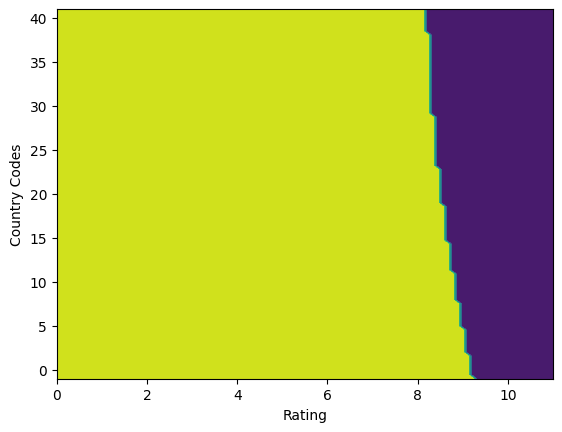

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(
     model, X_train, response_method="predict"
 )

plt.show()

In [25]:
accuray = accuracy_score(y_pred, y_test)
print("Accuracy:", accuray)

Accuracy: 0.7096774193548387


In [26]:
# Метод опорних векторів
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)

SVC(kernel='poly')